In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [10]:
#установим фиксированный размер наших графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [11]:
#чтобы не засорять вывод предупреждениями
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Сейчас пора, когда многие болеют. Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.
Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

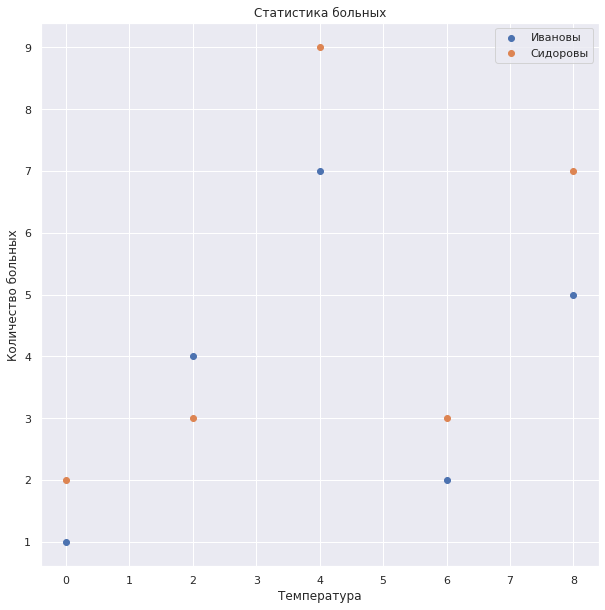

[0 2 4 6 8] [1 4 7 2 5] [2 3 9 3 7]


In [24]:
np.random.seed(11)
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы')
plt.scatter(x, family_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.xlabel('Температура')
plt.ylabel('Количество больных')
plt.legend()
plt.show()
print(x, family_ivan, family_sid)

In [ ]:
Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

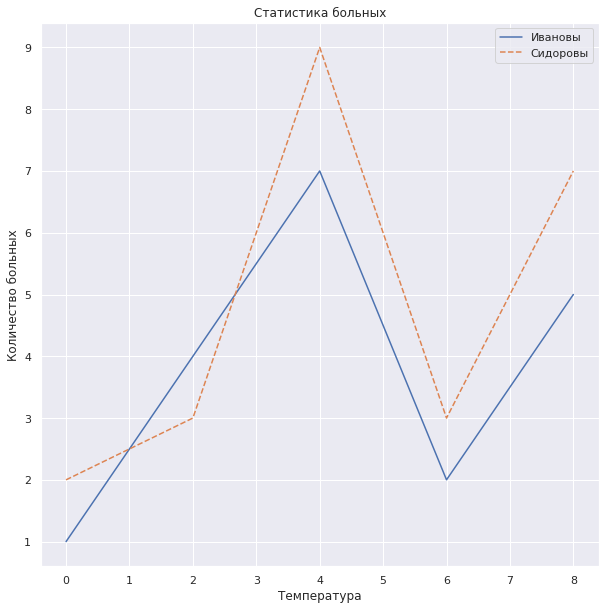

In [26]:
plt.plot(x, family_ivan, '-', label = "Ивановы")
plt.plot(x, family_sid, '--', label = "Сидоровы")
plt.title('Статистика больных')
plt.xlabel('Температура')
plt.ylabel('Количество больных')
plt.legend()
plt.show()

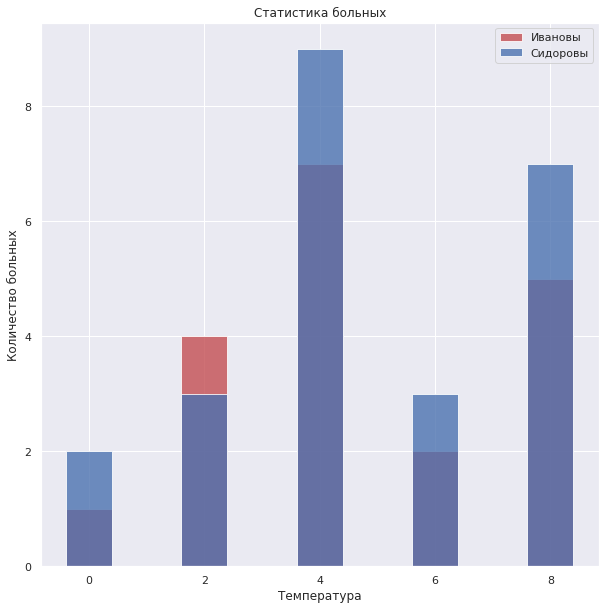

In [33]:
#Используя Bar-Chart
plt.bar(x, family_ivan, alpha = 0.8, label = "Ивановы", color = "r")
plt.bar(x, family_sid, alpha = 0.8, label = "Сидоровы", color = "b")
plt.title('Статистика больных')
plt.xlabel('Температура')
plt.ylabel('Количество больных')
plt.legend()
plt.show()

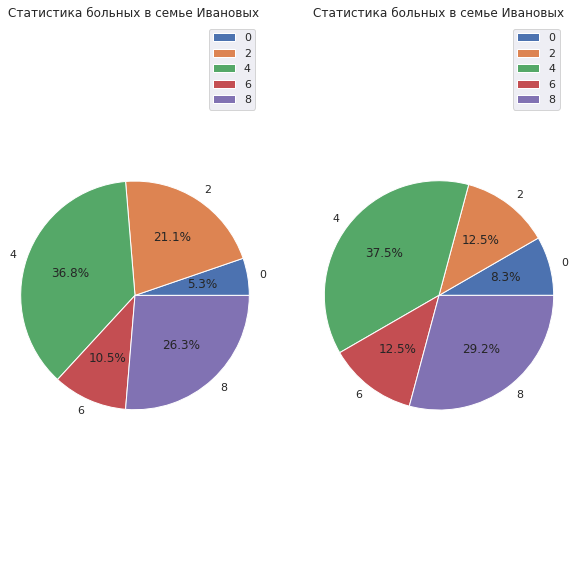

In [36]:
#Используя pie-chart:

plt.subplot(1, 2, 1)
plt.pie(family_ivan, labels = x, autopct = "%1.1f%%")
plt.axis("equal")
plt.title('Статистика больных в семье Ивановых')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(family_sid, labels = x, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Статистика больных в семье Ивановых')
plt.legend()

In [ ]:
Данные графики получились не интуитивно понятными.

Визуализация данных - важная часть работы, и всегда надо думать, в каком виде лучше представить их, чтобы графики получались наиболее информативными и понятными/

Давайте функции зависимоcти сделаем более гладкими:

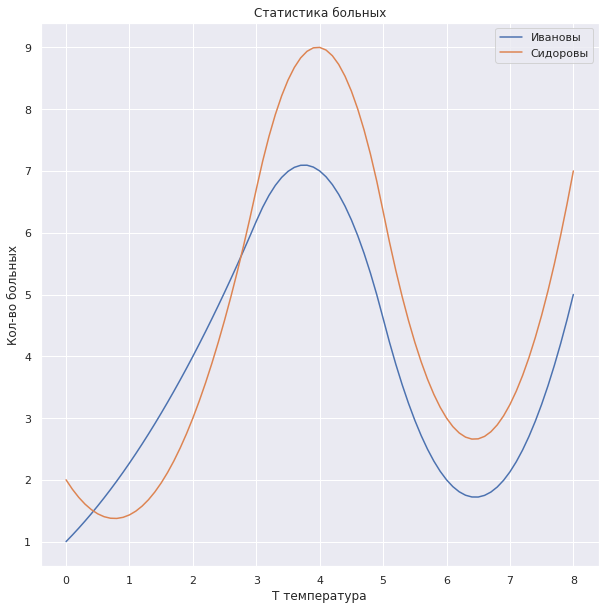

In [37]:
from scipy.interpolate import interp1d

f_ivan = interp1d(np.arange(0,10,2), family_ivan, kind = 'quadratic', fill_value = 'extrapolate')
f_sid = interp1d(np.arange(0, 10, 2), family_sid, kind = 'quadratic', fill_value = 'extrapolate')

#Отобразим

xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label = 'Ивановы')
plt.plot(xnew, ynew_sid, label = 'Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

In [ ]:
Найдем самую оптимальную температуру для каждой семьи:

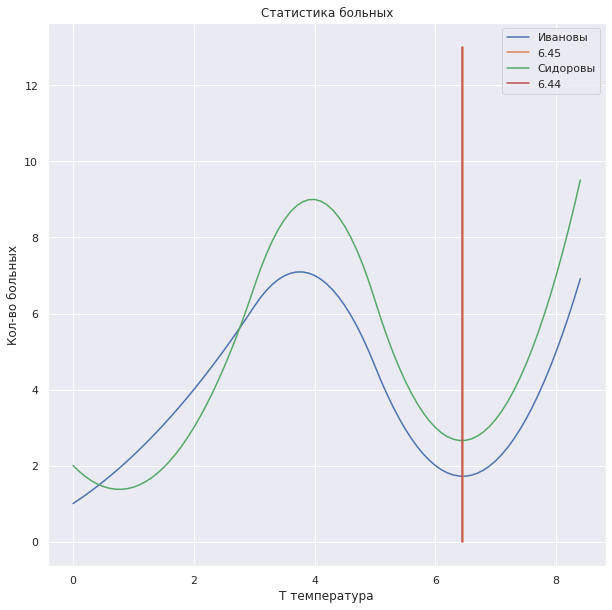

In [39]:
from scipy.optimize import minimize
max_ivan = minimize(f_ivan, x0=4)
max_sid = minimize(f_sid, x0 = 4)
xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label = 'Ивановы')
plt.plot([max_ivan.x[0]]*14, np.arange(0, 14), label = '{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label = 'Сидоровы')
plt.plot([max_sid.x[0]] * 14, np.arange(0, 14), label = '{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

In [ ]:
Также можно строить геометрические фигуры или параметрические линии  x=x(t) ,  y=y(t) .

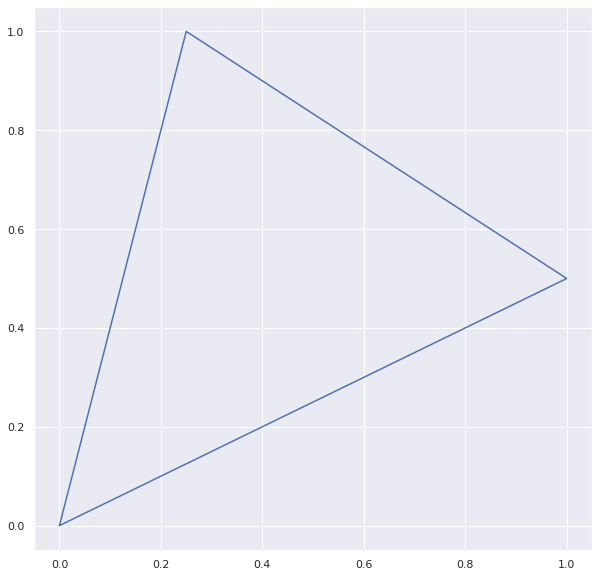

In [40]:
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

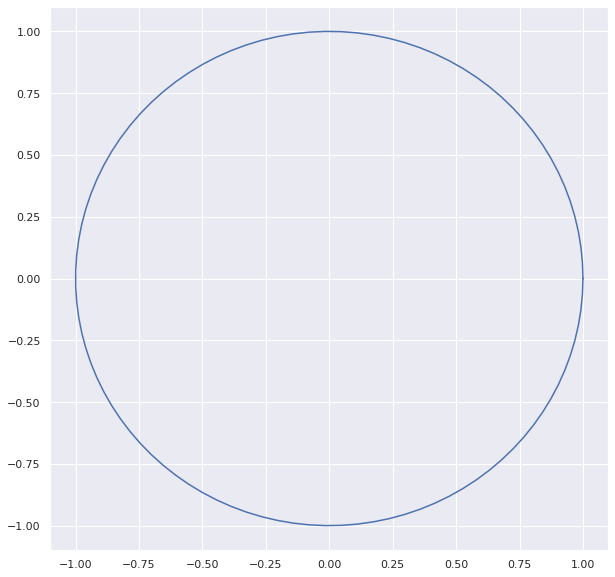

In [45]:
t = np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(t), np.sin(t))
#plt.axes().set_aspect(1)
plt.show()

In [ ]:
Попробуем сгенерировать выборку из нормального распределения и порисовать для нее графики:

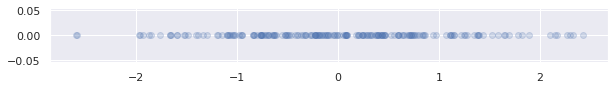

In [50]:
import scipy.stats as sts

#Сгенерируем 200 случайных точек
sample = sts.norm.rvs(size = 200)

plt.figure(figsize = (10, 1))
plt.scatter(sample, np.zeros(200), alpha = 0.2)
plt.show()

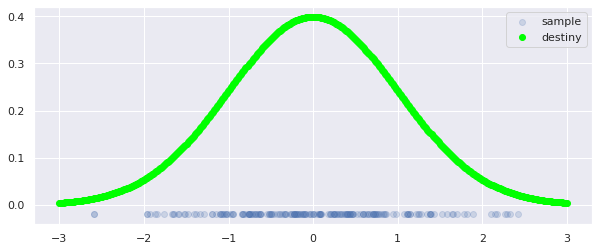

In [57]:
#Добавим график плотности:

grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(200) - 0.02, alpha = 0.2, label = 'sample')
plt.scatter(grid, sts.norm.pdf(grid), color = 'lime', label = 'destiny')
plt.legend()
plt.show()

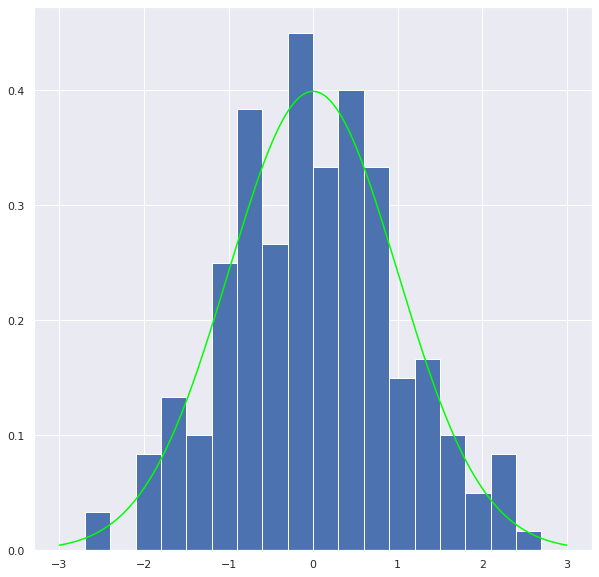

In [65]:
#Гистограмма вместо точек, так как она более наглядная:

plt.figure()
plt.hist(sample, range=(-3, 3), bins = 20, density= True)
plt.plot(grid, sts.norm.pdf(grid), color = 'lime', label = 'destiny')
plt.show()

In [66]:
Линии уровня

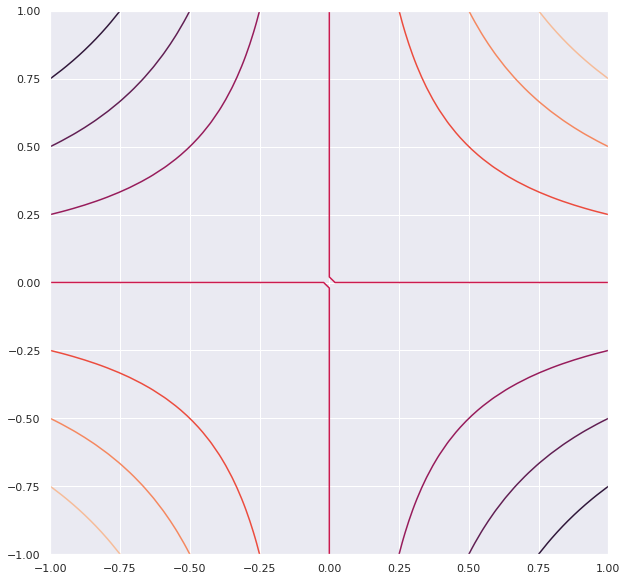

In [71]:
x = np.linspace(-1, 1, 50)
y = x
#Внешнее произведение
#то есть, если размер x и y =50, то размер z = (50, 50)
#где z[i][j] = x[i]*y[j]
z = x.reshape(-1, 1)*y
plt.contour(x, y, z)
plt.show()

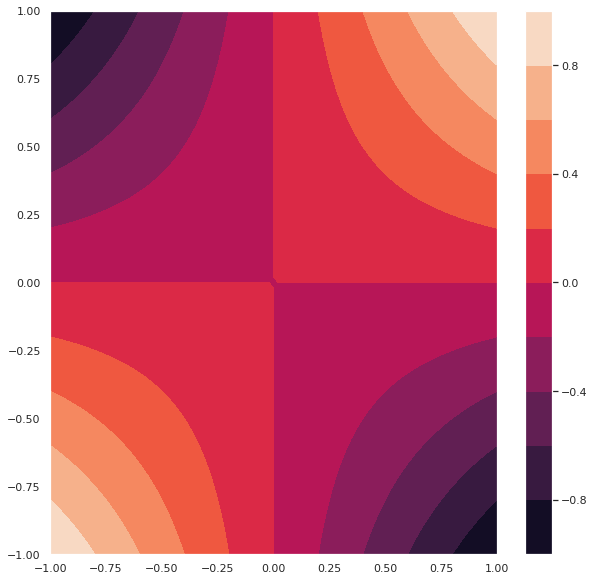

In [72]:
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
#colorbar показывает соответствие цвета и значения z
plt.colorbar()
plt.show()

In [ ]:
Полярные координаты:

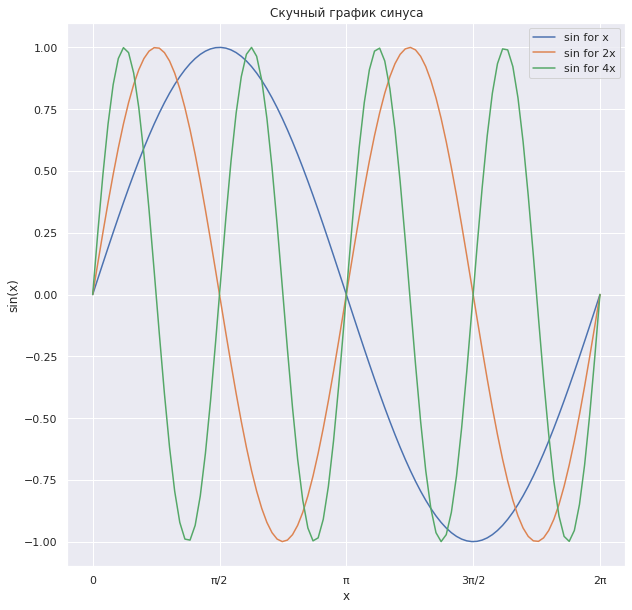

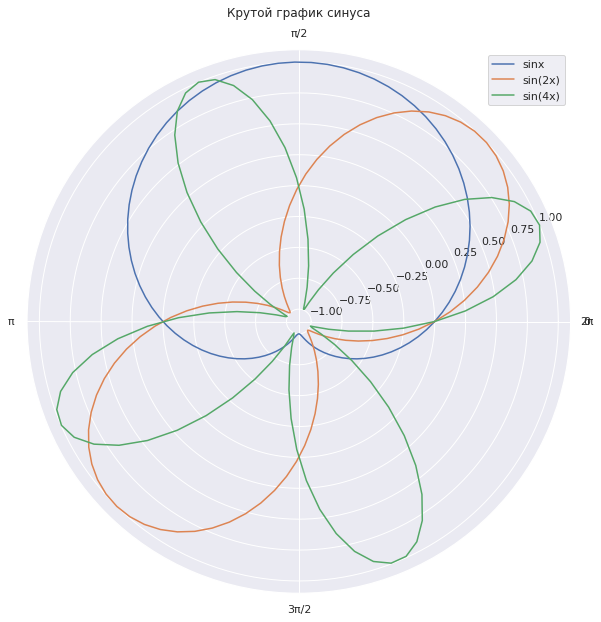

In [75]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(2 * x)
y4 = np.sin(4 * x)

#Обычный график:

plt.plot(x, y1, label = 'sin for x')
plt.plot(x, y2, label = 'sin for 2x')
plt.plot(x, y4, label = 'sin for 4x')
plt.title('Скучный график синуса')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', '2π'])
plt.legend()
plt.show()


#Полярный график синуса

plt.polar(x, y1, label = 'sinx')
plt.polar(x, y2, label = 'sin(2x)')
plt.polar(x, y4, label = 'sin(4x)')
plt.title('Крутой график синуса')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', '2π'])
plt.legend()
plt.show()

No handles with labels found to put in legend.


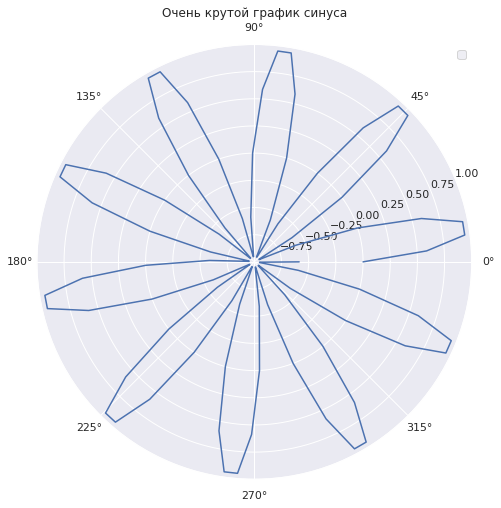

In [79]:
from IPython.display import HTML
from matplotlib import animation, rc

#Создадим нужную фигуру
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection = 'polar')

ax.set_title('Очень крутой график синуса')
ax.set_ylim([-1, 1])
ax.set_xlim([0, 2 * np.pi])
ax.set_xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', ''])
ax.legend()

#Линия, в которую мы будем класть данные
sinus_line = ax.plot([], [])[0]

def init(): #Отобразить бекграунд каждого фрейма
  sinus_line.set_data([], [])
  return (sinus_line,)

def animate(i): #Функция анимации
  y = np.sin(x * i /10)
  sinus_line.set_data(x, y)
  return(sinus_line,)

#Вызов анимации:
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 100, interval = 20, blit=True)

HTML(anim.to_html5_video())